In [70]:
#1)LDA模型训练准备:预处理数据。
# -*- coding:utf-8 _*_ 
import os
import re
import jieba
#from gensim import corpora, models, similarities 
# 创建停用词列表
def st_words_list(): 
    #词列表文件，逐行读取并去除换行符，将结果存入列表sw中
    sw=[line.strip() for line in open('stopwords.txt',encoding='gbk').readlines()] 
    return sw

# 对中文句子分词
def segment_depart(sentence):
    se_depart = jieba.cut(sentence.strip()) #用于对输入的中文文本进行分词和去除停用词操作，并去除文本两端的空白符
    stop_wd = st_words_list() 
    results = '' #定义一个空字符串results，用于存储分词结果
    for word in se_depart:
        if word not in stop_wd:# 如果分词结果word不在停用词列表中 
            results += word # 将分词结果word加入到字符串results中
            results += " "# 在分词结果word后添加一个空格
        return results

# 对文档分词
#if not os.path.exists('pre_corpora.txt'):
  
filename = "pre_corpora.txt" #表示需要进行预处理的文本文件名
out_fname = "train_corpora.txt" #表示预处理后的文本文件名
inputs = open(filename, 'r', encoding='UTF-8')
outputs = open(out_fname, 'w', encoding='UTF-8')


# 数据清理
for line in inputs:# 读取文件pre_corpora.txt中的每一行文本
    line=line.split('\t')[0] # 将每一行文本按照制表符\t进行分隔，并取出第一个元素
    # line =re.sub(r'[^\u4e00-\u9fa5]+','',line) # 使用正则表达式去除非中文字符
    if not line=='': # 如果文本非空
        lseg=segment_depart(line.strip()) # 调用函数segment_depart()对文本进行分词和去除停用词操作
        outputs.write(lseg.strip() + '\n') # 将处理后的文本写入文件train_corpora.txt中，并在文本末尾添加一个换行符

outputs.close()#关闭文件train_corpora.txt
inputs.close()#关闭文件pre_corpora.txt
print("数据清理完成!")


ModuleNotFoundError: No module named 'jieba'

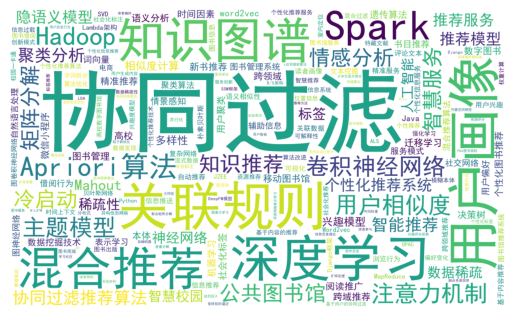

[('协同过滤', 87),
 ('用户画像', 16),
 ('关联规则', 15),
 ('深度学习', 14),
 ('知识图谱', 13),
 ('混合推荐', 12),
 ('Spark', 10),
 ('Apriori算法', 9),
 ('Hadoop', 8),
 ('卷积神经网络', 6)]

In [1]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
text = open('gjc.txt', 'r', encoding='UTF-8').read()
stopwords = open('stopwords.txt', 'r', encoding='gbk').read()
stopword_xj = ['图书', '图书馆', '用户', '算法', '系统', '模型', '数据', '服务', '读者', '推荐', '个性化','推荐系统', '图书推荐', '推荐', '个性化','个性化推荐','高校图书馆','图书推荐系统','智慧图书馆','数字图书馆','大数据','推荐算法','数据挖掘','个性化服务', '相似度','协同过滤算法','系统设计','聚类','协同过滤推荐']
list = text.split()
con_word = [x for x in list if x not in stopwords and x not in stopword_xj ]
word_tf = Counter(con_word)
wc = WordCloud(font_path='simhei.ttf', background_color='white', width=1000, height=600).generate_from_frequencies(word_tf)
plt.imshow(wc)
plt.axis('off')
plt.savefig('中文词云.jpg', dpi=600,bbox_inches='tight')
plt.show()
word_tf.most_common(10)


In [ ]:
# # pip install -U pkuseg
# import matplotlib.pyplot as plt

# from wordcloud import WordCloud
# from collections import Counter
# text = open('gjc2.txt', 'r', encoding='UTF-8').read()
# stopwords = open('stopwords1.txt', 'r', encoding='UTF-8').read()
# stopword_xj = [' MODEL', ' SYSTEMS', ' INFORMATION', ' MANAGEMENT', ' IMPACT', ' CHILDREN', ' QUALITY',' CARE', ' RECOMMENDATIONS', ' HEALTH', ]
# list = text.split(';')
# con_word = [x for x in list if x not in stopwords and x not in stopword_xj]
# word_tf = Counter( con_word)
# wc = WordCloud(font_path='simhei.ttf', background_color='white', width=1000, height=600).generate_from_frequencies(word_tf)
# plt.imshow(wc)
# plt.axis('off')
# plt.show()
# word_tf.most_common(50)

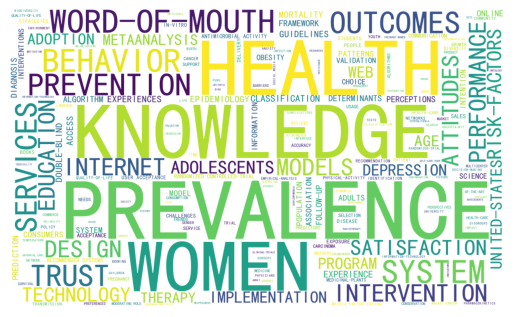

[(' PREVALENCE', 35),
 (' HEALTH', 31),
 (' KNOWLEDGE', 30),
 (' WOMEN', 25),
 ('WORD-OF-MOUTH', 25),
 (' BEHAVIOR', 25),
 (' SYSTEM', 25),
 (' PREVENTION', 22),
 (' OUTCOMES', 22),
 (' SERVICES', 22)]

In [94]:
# pip install -U pkuseg 这个不用了
import matplotlib.pyplot as plt

from wordcloud import WordCloud
from collections import Counter
text = open('gjc1.txt', 'r', encoding='UTF-8').read()
stopwords = open('stopwords1.txt', 'r', encoding='UTF-8').read()
stopword_xj = ['_MODEL', '_SYSTEMS', '_INFORMATION', '_MANAGEMENT', '_IMPACT', '_CARE','_CHILDREN', '_QUALITY', '_RISK', 'SYSTEMS', '_RECOMMENDATIONS' ]
list = text.split()
#print(list)
con_word = [x for x in list if x not in stopword_xj]
word_tf1 = Counter(con_word)
#print(type(word_tf1))
word_tf1=str(word_tf1).replace("_", " ")
word_tf1=word_tf1.replace("，", "： ")
word_tf1=word_tf1.replace("（", " ")
word_tf1=word_tf1.replace("）", " ")
word_tf=eval(word_tf1)

wc = WordCloud(font_path='simhei.ttf', background_color='white', width=1000, height=600).generate_from_frequencies(word_tf)
plt.imshow(wc)
plt.axis('off')
plt.show()
word_tf.most_common(10)

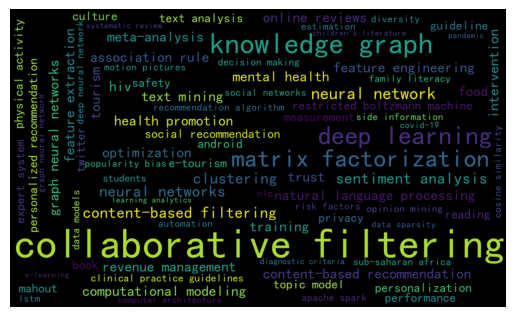

[('collaborative filtering', 49), ('knowledge graph', 19), ('deep learning', 15), ('matrix factorization', 14), ('neural network', 6), ('clustering', 5), ('sentiment analysis', 5), ('content-based filtering', 5), ('neural networks', 5), ('feature extraction', 4), ('content-based recommendation', 4), ('online reviews', 4)]


In [14]:
# pip install spacy-pkuseg
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter

with open('gjc1.txt', 'r', encoding='UTF-8') as f:
    text = f.read().lower()

#with open('stopwords1.txt', 'r', encoding='UTF-8') as f:
    #stopwords = f.read()

stopword_xj = ['recommender system', 'recommendation system', 'recommendation', 'pregnancy',
               'children', 'recommender systems', 'books', 'book recommendation', 'recommendation systems',
               'education', 'artificial intelligence', 'evaluation', 'big data', 'internet', 'data mining', 'machine learning', 'pharmacology', 'phytochemistry', 'pharmacokinetics', 'e-book', 'e-commerce','information retrieval', 'cancer', 'implementation']
# stopword_xh = ['data mining', 'pharmacology', 'books', 'book recommendation', 'recommendation systems',
#                'education', 'artificial intelligence', 'evaluation', 'big data', 'internet']

word_list = text.split('; ')
#con_word_list = [word for word in word_list if word not in stopword_xj and word not in stopwords]
con_word_list = [word for word in word_list if word not in stopword_xj]
word_tf = Counter(con_word_list)
con_word_list = [word for word in word_list if word not in stopword_xj]
word_tf = Counter(con_word_list)
word_tf1 = dict(word_tf.most_common(80))
wc = WordCloud(font_path='simhei.ttf', background_color='black', width=1000, height=600, max_font_size=400).generate_from_frequencies(word_tf1)
plt.imshow(wc)
plt.axis('off')
plt.savefig('英文词云.jpg', dpi=600, bbox_inches='tight')
plt.show()
print(word_tf.most_common(12))